In [6]:
%config IPCompleter.greedy=True

In [205]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabetes = load_diabetes()

In [206]:
df_X = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target)

In [207]:
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [208]:
df_y.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [209]:
np_X = df_X.to_numpy()
np_y = df_y.to_numpy()

In [212]:
X_train, X_test, y_train, y_test = train_test_split(np_X, 
                                                    np_y[:,0], 
                                                    test_size=0.2, 
                                                    random_state=7)

In [213]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

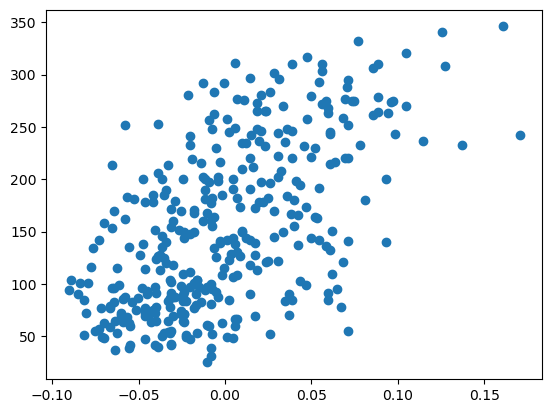

In [214]:
plt.scatter(x=X_train[:,2], y=y_train)

In [215]:
W = np.random.rand(10)
b = np.random.rand()
losses = []
def model(X,W,b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # y_pred 준비
    y_pred = model(X, W, b)
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

dW, db = gradient(np_X, W, b, np_y[:,0])
dW

array([-1.37070542, -0.3110196 , -4.29089616, -3.22793502, -1.54155418,
       -1.26385228,  2.88996033, -3.14450041, -4.13821764, -2.79456341])

In [216]:
LEARNING_RATE = 0.9
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 3539.9494
Iteration 200 : Loss 3154.3160
Iteration 300 : Loss 3008.6877
Iteration 400 : Loss 2943.0379
Iteration 500 : Loss 2912.0767
Iteration 600 : Loss 2896.9631
Iteration 700 : Loss 2889.3164
Iteration 800 : Loss 2885.2875
Iteration 900 : Loss 2883.0591
Iteration 1000 : Loss 2881.7510


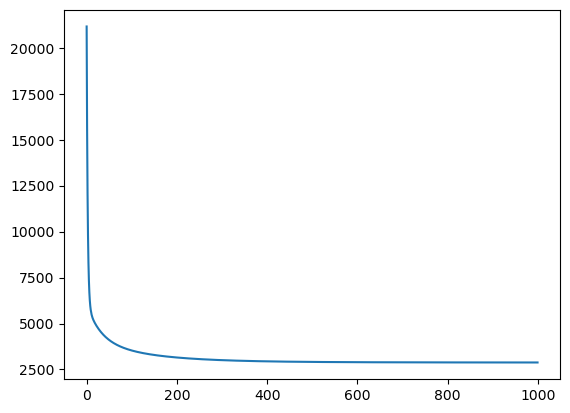

In [217]:
plt.plot(losses)
plt.show()

In [218]:
W, b

(array([ -51.4925713 , -249.57514572,  540.90262811,  331.0945247 ,
         -69.15323191, -121.99278891, -217.55736169,  126.44584969,
         475.13442567,   92.89669192]),
 153.99030974397579)

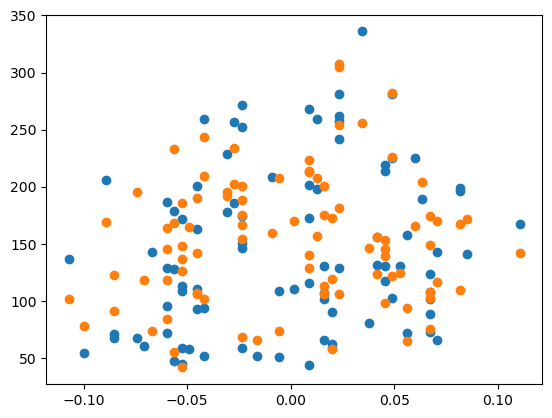

In [219]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [220]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([ 88.86167656, 143.64965715, 118.01362639, 222.48223831,
       155.04818784, 180.02353898,  60.71476863, 109.42475842,
        54.81913441, 170.1735393 , 145.66680794, 216.83951257,
       192.04124427, 215.01205319, 157.64040914, 145.44312022,
       140.46657677, 194.7093827 ,  32.3035521 , 144.14593173,
       234.33917676, 119.85502937, 237.07602669, 211.1782068 ,
       170.1317157 , 196.75711733, 259.59548704, 124.55870903,
       196.11704783, 157.21930498, 209.21800391, 216.1124694 ,
       195.2428691 , 174.82681382, 174.58311375, 163.91319968,
       101.86966371,  68.94481152, 248.66211205, 225.63835495,
       120.35877865, 170.64509824, 137.81796963, 280.54197643,
       159.70208972, 146.22998504, 159.09285627, 176.42883387,
       106.03844555, 108.48537627,  80.275797  , 151.58479715,
       170.68548974, 161.24454075,  67.23144493,  91.20266974,
       159.64991456,  92.20231986, 147.17501174,  60.72945102,
        72.26686055, 126.62164711, 129.34054352, 102.64

In [221]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2966.040299284217

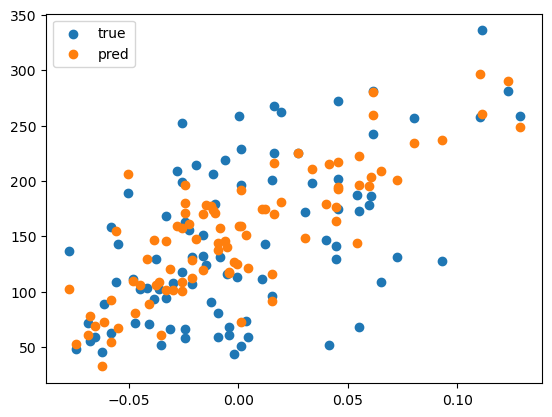

In [223]:
plt.scatter(X_test[:, 2], y_test, label="true")
plt.scatter(X_test[:, 2], predictions, label="pred")
plt.legend()
plt.show()